## Mô tả chuỗi thời gian


In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv", header=0)
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


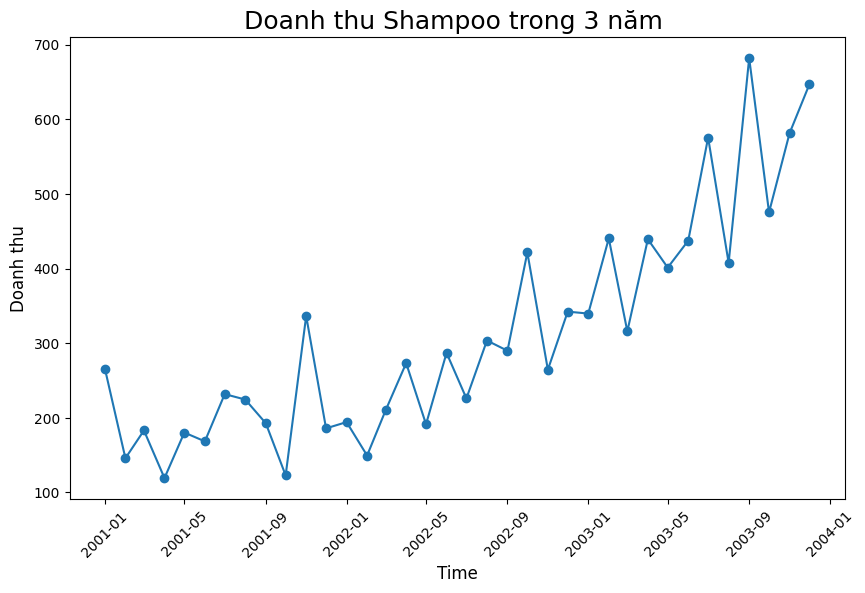

In [2]:
import matplotlib.pyplot as plt

# Create outlier in 2002-05
df.loc["2002-05"]["Sales"] = df.loc["2002-05"]["Sales"]+500

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], marker="o")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Doanh thu", fontsize=12)
plt.title("Doanh thu Shampoo trong 3 năm ", fontsize=18)
plt.show()

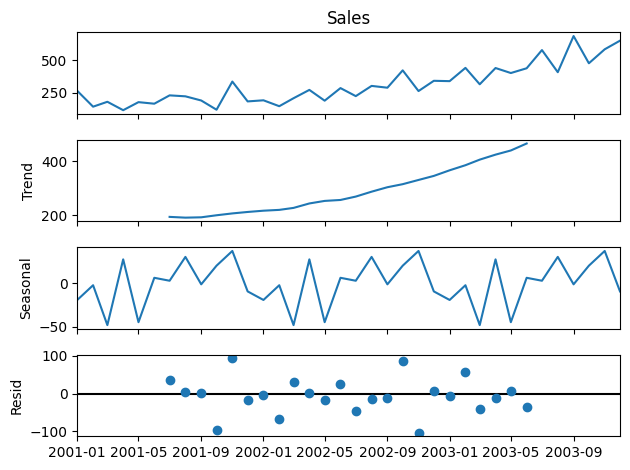

In [3]:
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Sales"], model='additive')
result.plot()
plt.show()

### Dữ liệu trước nội suy

In [4]:
df1 = pd.read_csv("DL_TongHop.csv")
df1.head()

,Thang,SoLuong,SoLuongDT,TienKM,CongTrinhXD,CPI,XuatKhau,NhapKhau,SxCongNghiep,FDIDangKy,FDIGiaiNgan,BanLe
0,2021-01,265547,1769949,3299284590,1291.666667,0.06,27700,26400,-3.3,2.02,1.51,479944.0
1,2021-02,213284,754632,2889266796,1291.666667,1.52,20000,20800,-21.1,3.44,0.99,439656.0
2,2021-03,638919,2520689,3373950838,1291.666667,-0.27,28600,28200,22.1,4.67,1.60,405124.0
3,2021-04,284667,2971660,1912420176,1291.666667,-0.04,25500,27000,1.1,2.12,1.40,409419.0
4,2021-05,533791,5048883,2374964929,1291.666667,0.16,26000,28000,1.6,1.75,1.65,393554.0


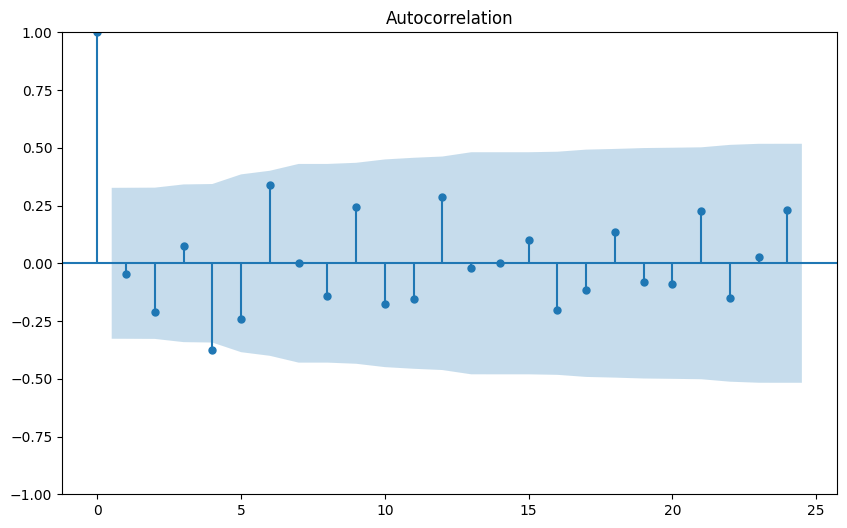

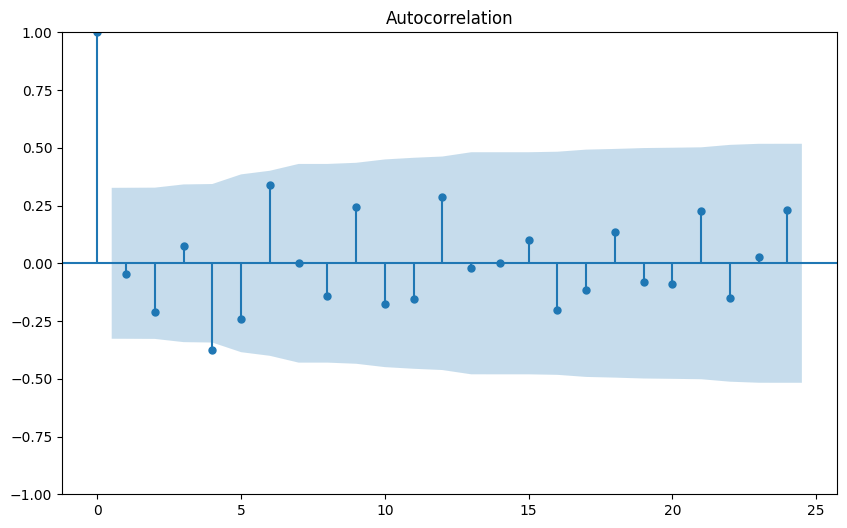

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure", figsize=(10, 6))
plot_acf(df1["SoLuong"], lags = 24)

### Lựa chọn đặc trưng

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
data_final = pd.read_csv('DL_TongHop.csv')

# Chọn các đặc trưng (X) và biến mục tiêu (y)
X = data_final.drop(columns=['SoLuong', 'Thang'])  # Chọn các cột đặc trưng, loại bỏ cột target_column
y = data_final['SoLuong']  # Chọn cột biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest (sử dụng RandomForestRegressor)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

# Lựa chọn đặc trưng dựa trên tầm quan trọng của các đặc trưng
feature_importances = rf.feature_importances_

# Tạo DataFrame để lưu trữ tầm quan trọng và đặc trưng tương ứng
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của tầm quan trọng
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In ra danh sách xếp hạng tầm quan trọng từ cao đến thấp
print("Ranking of feature importance:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# Hoặc bạn có thể in ra DataFrame để xem chi tiết
print("\nDetailed feature importance:")
print(feature_importance_df)


Ranking of feature importance:
FDIGiaiNgan: 0.2835508211167103
TienKM: 0.25200544485044213
SoLuongDT: 0.10874518704320277
FDIDangKy: 0.09670436558618466
CPI: 0.08140074516829118
BanLe: 0.06001929751500849
SxCongNghiep: 0.038045805677712985
XuatKhau: 0.03650698930704161
NhapKhau: 0.034877184686742405
CongTrinhXD: 0.008144159048663623

Detailed feature importance:
        Feature  Importance
8   FDIGiaiNgan    0.283551
1        TienKM    0.252005
0     SoLuongDT    0.108745
7     FDIDangKy    0.096704
3           CPI    0.081401
9         BanLe    0.060019
6  SxCongNghiep    0.038046
4      XuatKhau    0.036507
5      NhapKhau    0.034877
2   CongTrinhXD    0.008144


In [7]:
df1.describe()

,SoLuong,SoLuongDT,TienKM,CongTrinhXD,CPI,XuatKhau,NhapKhau,SxCongNghiep,FDIDangKy,FDIGiaiNgan,BanLe
count,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,372907.277778,2.671618e+06,4.643318e+09,1898.694444,0.272500,29107.277778,28291.305556,2.363889,2.651944,1.814167,462028.144444
std,155866.411073,1.176402e+06,5.102567e+09,1160.437526,0.427306,3188.122695,2763.576118,7.937475,1.361713,0.518313,68779.716864
min,123324.000000,7.546320e+05,1.033947e+09,648.833333,-0.620000,20000.000000,20800.000000,-21.100000,0.910000,0.990000,279843.000000
25%,265338.750000,1.898131e+06,1.748572e+09,1009.000000,0.010000,27000.000000,26785.000000,0.450000,1.862500,1.507500,418729.500000
50%,357668.000000,2.630856e+06,2.708902e+09,1411.583333,0.220000,29535.000000,28625.000000,2.300000,2.335000,1.710000,480584.450000
75%,467683.250000,3.331047e+06,4.754495e+09,3181.333333,0.450000,31162.500000,29850.000000,5.025000,3.060000,2.137500,512651.750000
max,708734.000000,6.023019e+06,2.312390e+10,3729.833333,1.520000,34517.000000,32672.000000,22.900000,7.750000,2.930000,565786.000000


### Dữ liệu sau khi nội suy


In [9]:
data_final = pd.read_csv("data_final.csv")
data_final.describe()

,OT,SoLuongDT,TienKM,CongTrinhXD,CPI,XuatKhau,NhapKhau,SxCongNghiep,FDIDangKy,FDIGiaiNgan,BanLe
count,71.000000,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,372685.043865,2.668611e+06,4.533184e+09,1911.336585,0.278863,29087.615185,28271.261835,2.411912,2.617781,1.808742,461206.626407
std,133311.847875,1.060808e+06,4.323453e+09,1121.927666,0.377578,2928.046602,2539.382744,6.714351,1.164412,0.460307,67486.377930
min,123324.000000,7.546320e+05,8.798503e+08,640.723741,-0.620000,20000.000000,20800.000000,-21.100000,0.910000,0.990000,279843.000000
25%,281408.238050,1.856012e+06,1.839188e+09,1009.000000,0.044270,26992.771295,26861.782680,0.675271,1.888419,1.496092,421926.805500
50%,374246.007600,2.624182e+06,2.601137e+09,1501.360479,0.250000,29500.000000,28367.446230,2.400000,2.485403,1.720000,479944.000000
75%,457515.152400,3.338024e+06,5.631836e+09,3179.868860,0.463572,31652.153925,29837.516750,5.149673,3.083380,2.096891,513136.500000
max,708734.000000,6.023019e+06,2.312390e+10,3758.586363,1.520000,34517.000000,32672.000000,22.900000,7.750000,2.930000,565786.000000


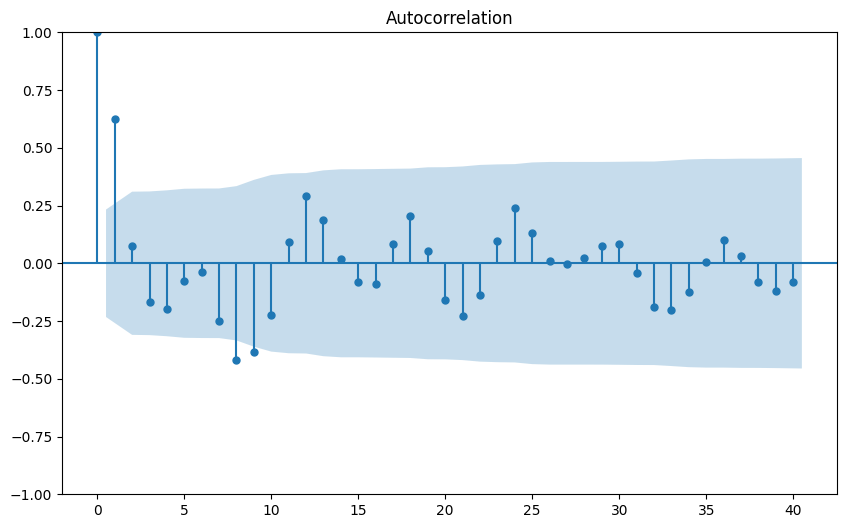

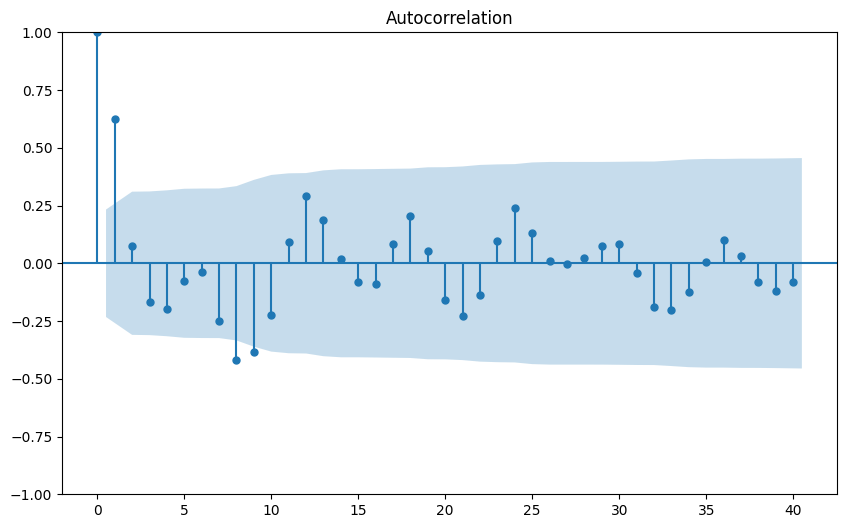

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure", figsize=(10, 6))
plot_acf(data_final["OT"], lags = 40)

C:\Users\User\AppData\Local\Temp\ipykernel_9400\3968836531.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_final.corr()


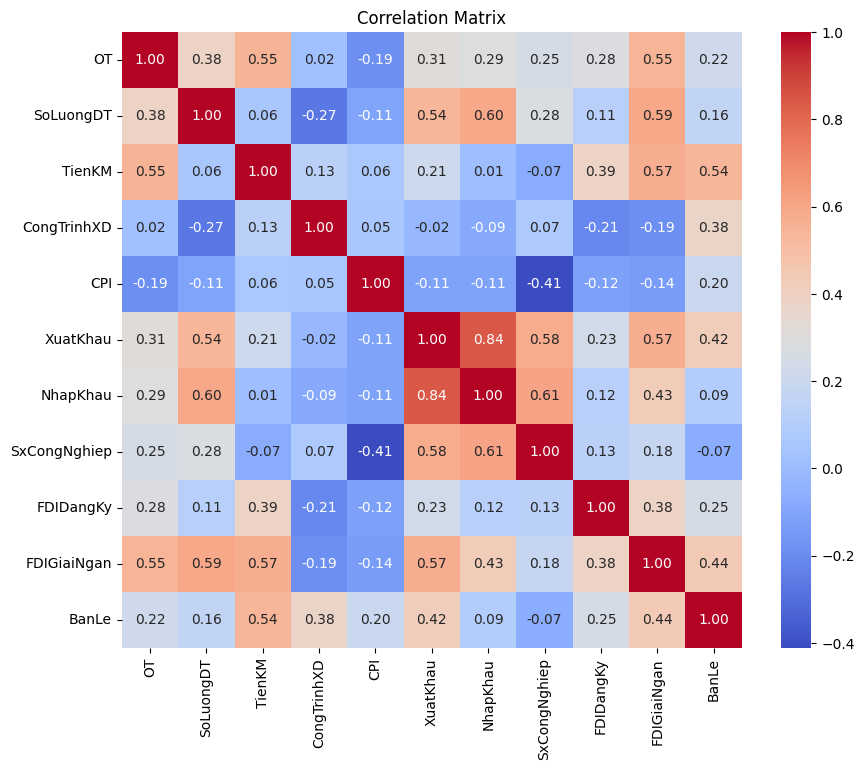

In [12]:

import seaborn as sns


# Tính toán ma trận tương quan
correlation_matrix = data_final.corr()

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
data_final = pd.read_csv('data_final.csv')

# Chọn các đặc trưng (X) và biến mục tiêu (y)
X = data_final.drop(columns=['SoLuong', 'Thang'])  # Chọn các cột đặc trưng, loại bỏ cột target_column
y = data_final['SoLuong']  # Chọn cột biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest (sử dụng RandomForestRegressor)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

# Lựa chọn đặc trưng dựa trên tầm quan trọng của các đặc trưng
feature_importances = rf.feature_importances_

# Tạo DataFrame để lưu trữ tầm quan trọng và đặc trưng tương ứng
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sắp xếp theo thứ tự giảm dần của tầm quan trọng
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In ra danh sách xếp hạng tầm quan trọng từ cao đến thấp
print("Ranking of feature importance:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

# Hoặc bạn có thể in ra DataFrame để xem chi tiết
print("\nXếp hạng tầm quan trọng của các đặc trưng:")
print(feature_importance_df)


Ranking of feature importance:
TienKM: 0.5122146226872983
FDIGiaiNgan: 0.117912614102608
SoLuongDT: 0.06294631575952446
BanLe: 0.0595181338157261
SxCongNghiep: 0.056000690577830727
NhapKhau: 0.049870530354617776
CPI: 0.04447249033326596
FDIDangKy: 0.038933476545510964
XuatKhau: 0.031282316063666285
CongTrinhXD: 0.02684880975995142

Xếp hạng tầm quan trọng của các đặc trưng:
        Feature  Importance
1        TienKM    0.512215
8   FDIGiaiNgan    0.117913
0     SoLuongDT    0.062946
9         BanLe    0.059518
6  SxCongNghiep    0.056001
5      NhapKhau    0.049871
3           CPI    0.044472
7     FDIDangKy    0.038933
4      XuatKhau    0.031282
2   CongTrinhXD    0.026849


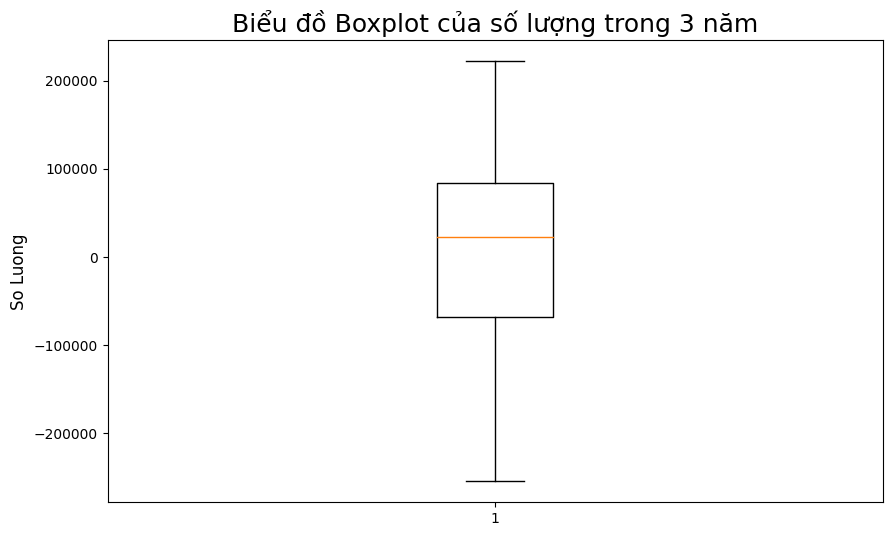

In [ ]:
diff_sales= data_final["SoLuong"][1:].values - data_final["SoLuong"][:-1].values
plt.figure(figsize=(10, 6))
plt.boxplot(diff_sales)
plt.ylabel("So Luong", fontsize=12)
plt.title("Biểu đồ Boxplot của số lượng trong 3 năm", fontsize=18)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cols_data = data_final.columns[1:4]
df_data = data_final[cols_data]
train_data = df_data[:int(0.5*len(df_data))]
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
df_data_scaled = scaler.transform(df_data)
df_data_scaled = pd.DataFrame(df_data_scaled, columns=cols_data)
df_data_scaled

,SoLuong,SoLuongDT,TienKM
0,-0.787196,-0.825176,1.028654
1,-0.830587,-1.412206,1.285878
2,-1.167648,-1.823513,0.557278
3,0.450289,-0.921095,0.958239
4,1.930793,-0.086991,1.114493
...,...,...,...
66,-0.793260,0.805207,2.997243
67,0.004087,0.844381,4.059408
68,0.673370,1.092863,4.286990
69,1.268036,1.181472,14.238642


In [ ]:
diff_sales1 = df_data_scaled["SoLuong"][1:].values - df_data_scaled["SoLuong"][:-1].values
diff_sales2 = df_data_scaled["SoLuongDT"][1:].values - df_data_scaled["SoLuongDT"][:-1].values
diff_sales3 = df_data_scaled["TienKM"][1:].values - df_data_scaled["TienKM"][:-1].values

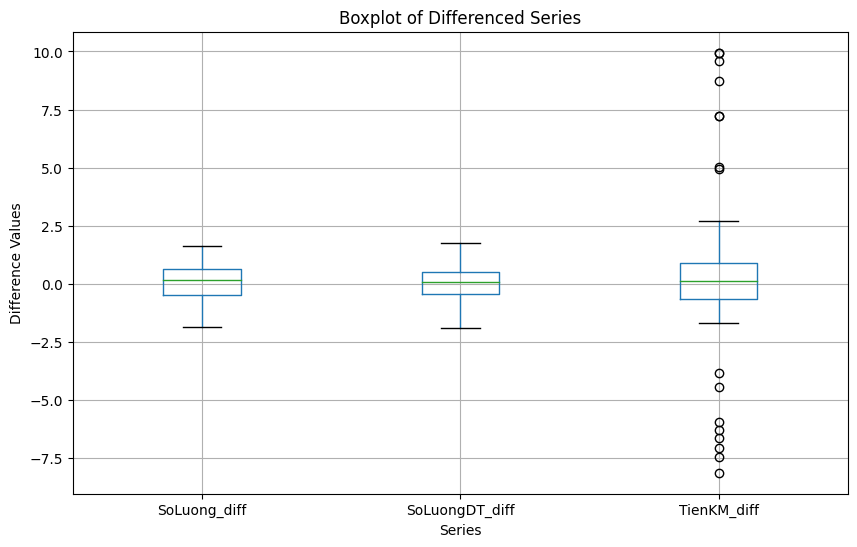

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử data_final là một DataFrame đã được load sẵn
# data_final = pd.read_csv('path_to_your_data.csv')

# Tính các chuỗi khác biệt
diff_sales1 = df_data_scaled["SoLuong"].diff().dropna()
diff_sales2 = df_data_scaled["SoLuongDT"].diff().dropna()
diff_sales3 = df_data_scaled["TienKM"].diff().dropna()

# Tạo DataFrame mới từ các chuỗi khác biệt để tiện cho việc vẽ biểu đồ
diff_data = pd.DataFrame({
    'SoLuong_diff': diff_sales1,
    'SoLuongDT_diff': diff_sales2,
    'TienKM_diff': diff_sales3
})

# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 6))
diff_data.boxplot()
plt.title('Boxplot of Differenced Series')
plt.ylabel('Difference Values')
plt.xlabel('Series')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def detect_outliers(series):
  """
    series: 1-D numpy array input
  """
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outlier_idxs = np.where(lower_compare | upper_compare)[0]
  return outlier_idxs

outlier_idxs=detect_outliers(diff_sales3)
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df_data_scaled.index[outlier_idxs+1].values)
print("Outlier values: ", diff_sales3[outlier_idxs])

Outlier indices:  [44 45 46 47 52 53 56 57 58 59 62 63 64 65 68 69]
Outlier months:  [45 46 47 48 53 54 57 58 59 60 63 64 65 66 69 70]
Outlier values:  44    0.651064
45    7.213692
46    7.233863
47   -6.296002
52   -0.379114
53   -3.827565
56    1.959475
57    4.925250
58    5.026282
59   -8.137962
62    0.207472
63    8.717333
64    9.933007
65   -7.453767
68    0.227582
69    9.951652
Name: TienKM, dtype: float64


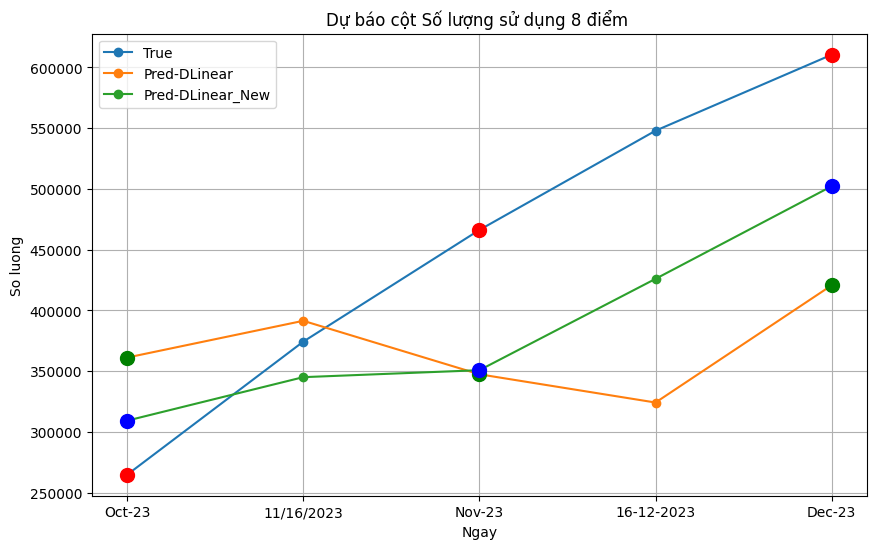

In [16]:
import matplotlib.pyplot as plt

# Data
x_labels = ['Oct-23', '11/16/2023', 'Nov-23', '16-12-2023', 'Dec-23']
true_values = [264714, 374246, 466186, 547875.6, 610415]
pred_dlinear = [361141.47	,391402.97,	347384.1	,324132.44	,420634.28
]
pred_dlinear_new = [309219.72,	345017.5	,350756.1,	425950.16,	502168.7
]

# Highlight points
highlight_points = ['Oct-23', 'Nov-23', 'Dec-23']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_labels, true_values, marker='o', label='True')
plt.plot(x_labels, pred_dlinear, marker='o', label='Pred-DLinear')
plt.plot(x_labels, pred_dlinear_new, marker='o', label='Pred-DLinear_New')

# Highlight specific points
for hl in highlight_points:
    index = x_labels.index(hl)
    plt.scatter(x_labels[index], true_values[index], color='red', s=100, zorder=5)  # True values
    plt.scatter(x_labels[index], pred_dlinear[index], color='green', s=100, zorder=5)  # Pred-DLinear
    plt.scatter(x_labels[index], pred_dlinear_new[index], color='blue', s=100, zorder=5)  # Pred-DLinear_New

# Labels and title
plt.xlabel('Ngay')
plt.ylabel('So luong')
plt.title('Dự báo cột Số lượng sử dụng 8 điểm ')
plt.legend()
plt.grid(True)
plt.show()
